In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk

In [3]:
data = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import re
from nltk.corpus import stopwords,wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = nltk.stem.porter.PorterStemmer()
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

data['Resume'] = data['Resume'].apply(lambda w: cleanResume(w))

In [6]:
X = np.array(data['Resume'][:])

In [7]:
Y = data['Category']
Y = np.array(Y)
Y[:5]

array(['Data Science', 'Data Science', 'Data Science', 'Data Science',
       'Data Science'], dtype=object)

In [8]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(data['Resume']).toarray()

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout
from keras.layers import Conv1D,MaxPool1D,GlobalMaxPooling1D,GlobalAveragePooling1D

In [12]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train, num_classes = 25, dtype='float32')
y_test=to_categorical(y_test, num_classes = 25, dtype='float32')

In [13]:
voc_size = 10000

In [14]:
model = Sequential()
model.add(Embedding(voc_size,1000, input_length=X_train.shape[1]))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [15]:
X_train = np.array([np.array(val) for val in X_train])

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [17]:
history = model.fit(X_train, y_train, batch_size = 64, epochs=150, validation_data = (X_test,y_test),callbacks = callback,verbose=1)

Epoch 1/150
13/13 [==============================] - 29s 734ms/step - loss: 3.2232 - accuracy: 0.0299 - val_loss: 3.2197 - val_accuracy: 0.0829
Epoch 2/150
13/13 [==============================] - 6s 462ms/step - loss: 3.2172 - accuracy: 0.0611 - val_loss: 3.2139 - val_accuracy: 0.0829
Epoch 3/150
13/13 [==============================] - 5s 406ms/step - loss: 3.2077 - accuracy: 0.0715 - val_loss: 3.2100 - val_accuracy: 0.0829
Epoch 4/150
13/13 [==============================] - 5s 399ms/step - loss: 3.1983 - accuracy: 0.0663 - val_loss: 3.2076 - val_accuracy: 0.0777
Epoch 5/150
13/13 [==============================] - 6s 458ms/step - loss: 3.1960 - accuracy: 0.0715 - val_loss: 3.2020 - val_accuracy: 0.0777
Epoch 6/150
13/13 [==============================] - 5s 426ms/step - loss: 3.1917 - accuracy: 0.0806 - val_loss: 3.2018 - val_accuracy: 0.0829
Epoch 7/150
13/13 [==============================] - 5s 389ms/step - loss: 3.1808 - accuracy: 0.0845 - val_loss: 3.1922 - val_accuracy: 0.077

In [18]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 1s 50ms/step - loss: 0.3341 - accuracy: 0.9275


[0.334143728017807, 0.9274611473083496]

Text(0.5, 1.0, 'Validation Loss')

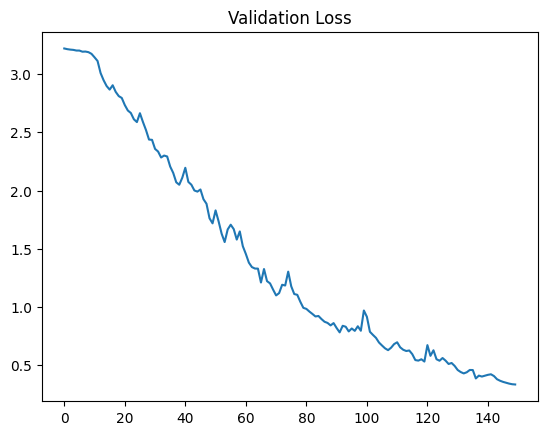

In [19]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')

Text(0.5, 1.0, 'Validation accuracy')

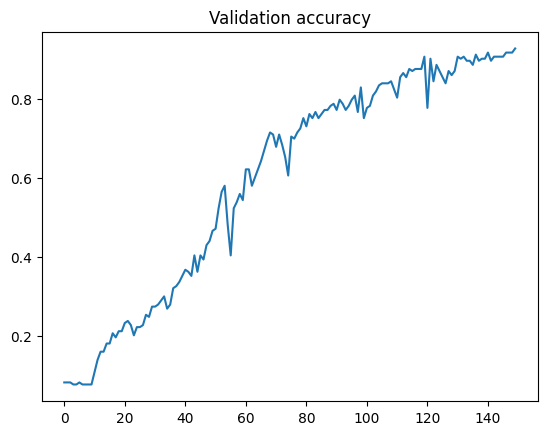

In [20]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')